## Pilot Project: Bike Rides in San Francisco

© 2023, Zaka AI, Inc. All Rights Reserved.

---


###**Case Study:** Analyzing & Forecasting the number of bike rides in San Francisco
**Objective:** The goal of this challenge is to let you dive deep into time-series signals, analyze it and determine the best predictive model.
The challenge is divided into 2 parts:

* **Part A:** You will use time-series data of the number of bike rides in San Fransisco and analyze it to better understand it and choose one of the statistical models you learned during the week to predict future values.

* **Part B:** You will prepare the same data and structure it in order to train an RNN to predict the number of bike rides for the next 7 days.


##Part A: Time-series analysis and forecasting



## Time-series Analysis



### Importing the libraries
Before loading the data, import pandas library and matplotlib.

In [ ]:
# Test Your Zaka
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading & Visualization
Start by loading the dataset and visualize it **in terms of the date** before performing any analysis.

<AxesSubplot:xlabel='date'>

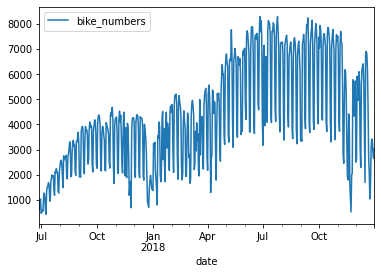

In [ ]:
# Test Your Zaka
df = pd.read_csv("/content/Bike Rides aggregated.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.plot()

Notice how the number of bike rides is maximum during July and October 2018 and minimum during January 2018.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 2017-06-28 to 2018-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   bike_numbers  552 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


In [ ]:
df

,bike_numbers
date,
2017-06-28,632
2017-06-29,1019
2017-06-30,1038
2017-07-01,475
2017-07-02,523
...,...
2018-12-27,3418
2018-12-28,3386
2018-12-29,2908


### Data Decomposition
The statsmodels library provides an implementation of the decomposition method in a function called seasonal_decompose(). Use it to decompose your data and specify the model to be additive.



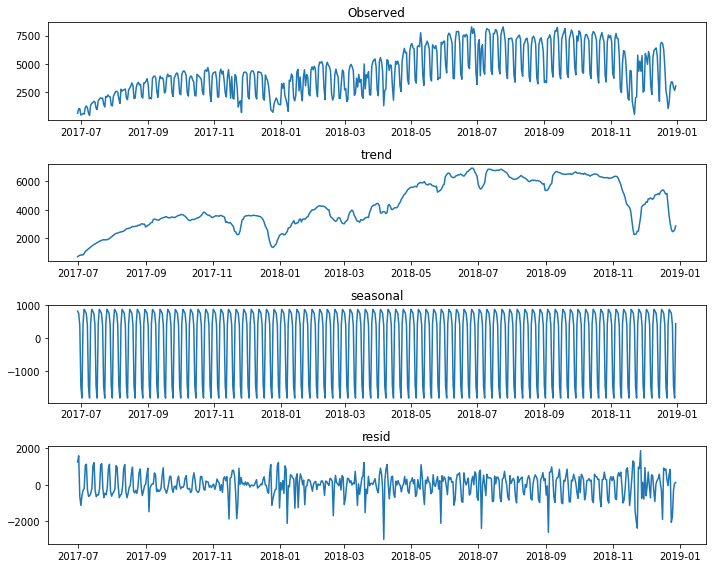

In [ ]:
# Test Your Zaka
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df,model='additive')
Trend_add= result_add.trend
Seasonality_add = result_add.seasonal
Residual_add = result_add.resid
Observed_add = result_add.observed

# We'll plot our finding to better visualize it
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(Observed_add)
plt.title('Observed')

plt.subplot(412)
plt.plot(Trend_add)
plt.title('trend')

plt.subplot(413)
plt.plot(Seasonality_add)
plt.title('seasonal')

plt.subplot(414)
plt.plot(Residual_add)
plt.title('resid')

plt.tight_layout()


1. Do you observe any trend in the Data?
2. Is there a seasonality pattern?

**Share Your Zaka**

**1. we notice an increasing trend in the bike numbers over time.**

**2. yes, we notice a regular and repeating pattern over time.**

### Autocorrelation
To better understand time-series, we need to study its autocorrelation which gives us an idea on how lags are affecting current/future values.
Use the Autocorrelation function from the statsmodel library and try few values for the number of lags.

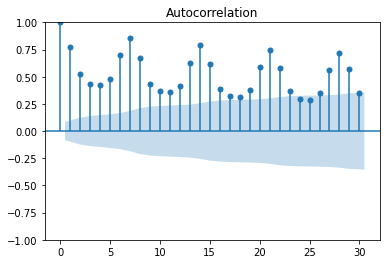

In [ ]:
# Test Your Zaka
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df, lags=30 )
plt.show()

**Lags = 30 (data over 1 month)**

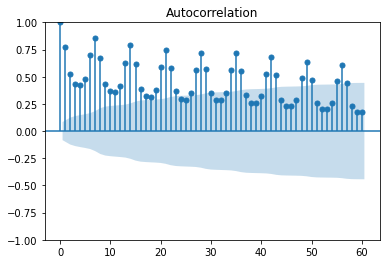

In [ ]:
plot_acf(df, lags=60)
plt.show()

**Lags = 60 (data over 2 months)**

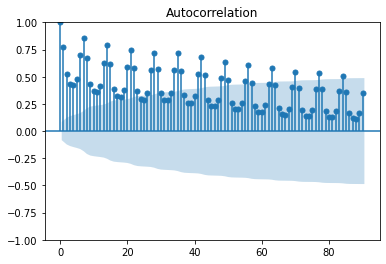

In [ ]:
plot_acf(df, lags=90)
plt.show()

**Lags = 90 (data over 3 months)**

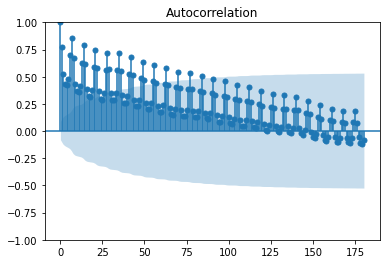

In [ ]:
plot_acf(df,lags=180)
plt.show()

**Lags = 180(data over 6 months)**

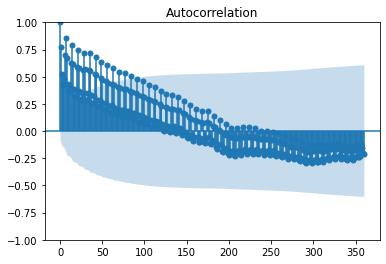

In [ ]:
plot_acf(df, lags=360)
plt.show()

**Lags = 360 (Data over approx. 1 year)**

Analyze the autocorrelation plot and check if:
- the data is stationary
- there is a seasonal pattern

**Share Your Zaka**

**We notice a increasing trend in the data over all and seasonal patterns, hence it is *non-stationary*. We can observe that, weekly, the autocorrelation coeffecient of lags increases and decreases. It peaks on Wednesdays and reaches a minimum on Sundays (probably because people tend to ride their bikes to work and not as much on weekends). Moreover, we notice another seasonality, where the number of bikes tends to drop during winter months and increases again towards summer months.**

### Partial Autocorrelation
Use the function provided by the statsmodels library to study the partial autocorrelation of the TS signal and set the number of lags to 25.

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


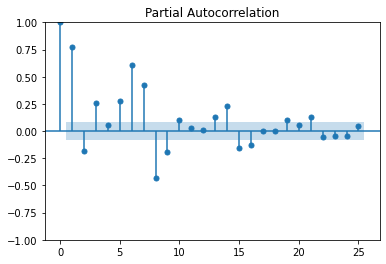

In [ ]:
# Test Your Zaka
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df, lags=25)
plt.show()

## Time-series Forecasting
The goal of this section is to use the previous analysis to determine which of the statistical models you learned through the week.



### Simple moving average

Start by applying a simple moving average filter on the data with a window of size 20.

<AxesSubplot:xlabel='date'>

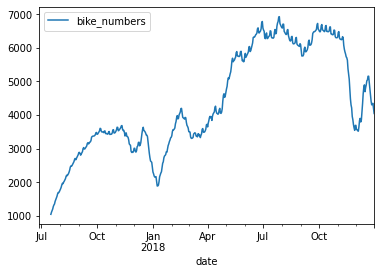

In [ ]:
# Test Your Zaka
amd=df.rolling(window =20).mean()
amd.plot()

To better see the effect of the moving average filter:
- set the first 400 days for training and the rest for testing
- copy the dataframe and add a column to the predicted value with window size of 2

In [ ]:
# Test Your Zaka
training_data = amd[:400]
testing_data = amd[400:]
prediction_data = amd.copy()

prediction_data['predicted_bike_numbers'] = prediction_data['bike_numbers'].rolling(window=2).mean()


Now let's plot the training, testing data, and the predictions made by the simple moving average on the same graph.

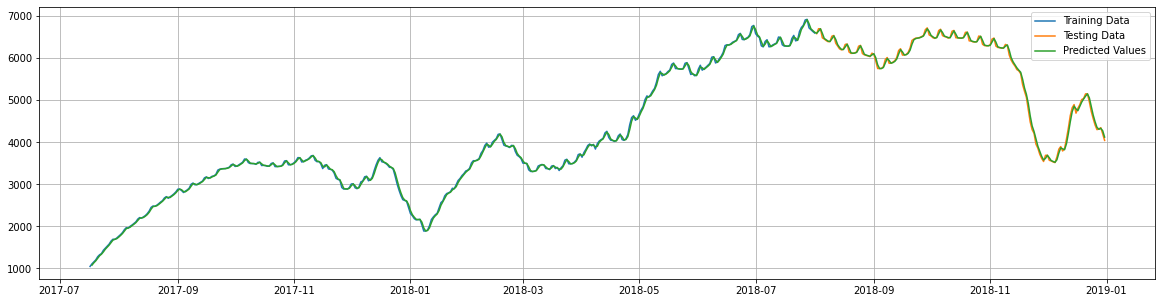

In [ ]:
# Test Your Zaka
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(training_data.index, training_data, label='Training Data')
plt.plot(testing_data.index, testing_data, label='Testing Data')
plt.plot(prediction_data.index, prediction_data['predicted_bike_numbers'], label='Predicted Values')
plt.legend()
plt.show()

**We notice that the plots overlap, which is an indication that our model is likely performing well. However, it might also be overfitting the data**

### Statistical models


- Check if the TS is stationary using the ADF test and/or some statistical measures
- if the data is non-stationary, transform it into a stationary signal and confirm your results again
- explain why each of the statistical models is a good/bad model to forecast future values of the number of bike rides.
- if the results are not satisfying, resonate why

**Share Your Zaka**

**Our answers for this part are found below**

1. **Checking if the data is stationary using the ADF test:**

In [ ]:
# Test Your Zaka
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.130982
p-value: 0.232241


**2. the ADF is negative and p-value > 0.05: we fail to reject the null hypothesis (which is that the data is non-stationary. (so our TS is non-stationary). In order to make it stationary, we will perform Differencing using the diff function.**

In [ ]:
diff = df.diff()
diff.plot()

In [ ]:
diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 2017-06-28 to 2018-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bike_numbers  551 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [ ]:
diff

,bike_numbers
date,
2017-06-28,NaN
2017-06-29,387.0
2017-06-30,19.0
2017-07-01,-563.0
2017-07-02,48.0
...,...
2018-12-27,395.0
2018-12-28,-32.0
2018-12-29,-478.0


3.**We need to remove the null values and make sure it is stationary now.**

In [ ]:
diff.dropna(inplace=True)

In [ ]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.362237
p-value: 0.000000


In [ ]:
diff

,bike_numbers
date,
2017-06-29,387.0
2017-06-30,19.0
2017-07-01,-563.0
2017-07-02,48.0
2017-07-03,77.0
...,...
2018-12-27,395.0
2018-12-28,-32.0
2018-12-29,-478.0


**The ADF Statistic decreased a lot to the level of insignificance the p-value=0 which is a very strong evidence that our data is now stationary.**



*  **AutoRegressive (AR) Model: This model may be a good fit for our data before we transformed it into stationary. First, there are large significant PACF values. Also, It is a useful tool for forecasting future values of the time series based on its past values. For this reason, it is good for data where there are clear trends and correllations. Otherwise, it may try to create or fit a trend that is not there leading to inaccurate outputs. Thus, it is good for our original data but bad for out differenced (stationary) data. However, since we have seasonality, we might opt for a more complex model.**
*   **Moving Average (MA) Model: We observed that this model performed well on our data before differencing. However, MA is not known to perform well on non-stationary data, so the case here might be that the non-stationarity wasn't very strong, or there might be a seasonal component in the data that the MA model is capturing, or simply due to chance or overfitting. However, MA is better and a good fit for our data after differencing**
*   **Autoregressive Moving Average Model (ARMA): The ARIMA model would be a good fit for our data since it combines the AR and the MA models and is good for data that shows trends and seasonality like the TS data we are dealing with. However, it can only be used for stationary data so we need to make sure to difference before.**
*   **Autoregressive Integrated Moving Average Model (ARIMA): Similar to ARMA, ARIMA is a good fit for our TS data and can helpful with the differencing as it tell me how many times to difference and it differences the data. It can handle stationary and non-stationary data.**

**These are general descriptions. Now we will dive into testing the models. First, we will plot ACF and PACF of the differenced dataset.**

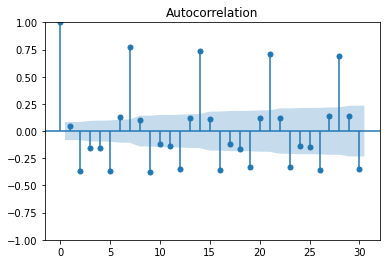

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff, lags=30)
plt.show()

**We don't notice a gradual decrease; it is rather an instant decrease. AR might not be ita good fit. Number of significant lags=16**.

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


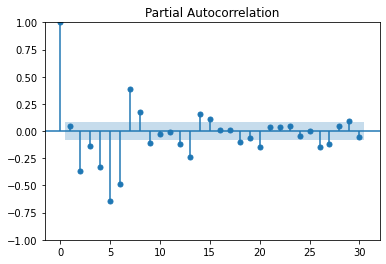

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(diff, lags=30)
plt.show()

**Significant lags: 17**

**So we can see that MA is a good option because in our PACF we have a significantly high lag that is then damped and then is negative.**

In [ ]:
train_len = 400
train = diff[:train_len]
test = diff[train_len:]
print(train)

            bike_numbers
date                    
2017-06-29         387.0
2017-06-30          19.0
2017-07-01        -563.0
2017-07-02          48.0
2017-07-03          77.0
...                  ...
2018-07-29        -668.0
2018-07-30        3535.0
2018-07-31         -22.0
2018-08-01          45.0
2018-08-02          17.0

[400 rows x 1 columns]


**AR:**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Test RMSE: 870.669


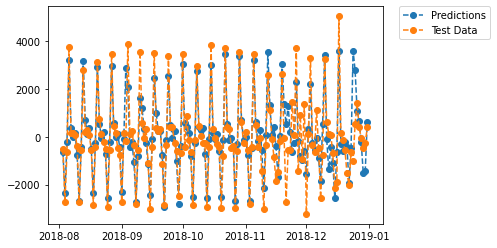

In [ ]:
#AutoRegressive model 6 - 8
!pip install statsmodels --upgrade

from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
from sklearn.metrics import mean_squared_error

ar_model = AutoReg(diff,lags=20).fit()
pred = ar_model.predict(start=test.index.min(), end=test.index.max())

rmse = sqrt(mean_squared_error(test, pred))

print('Test RMSE: %.3f' % rmse)


plt.plot(pred, linestyle='--', marker='o', label='Predictions')
plt.plot(test, linestyle='--', marker='o', label='Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


**We notice that there is some accuracy, but it can be improved.**

**MA Model:**

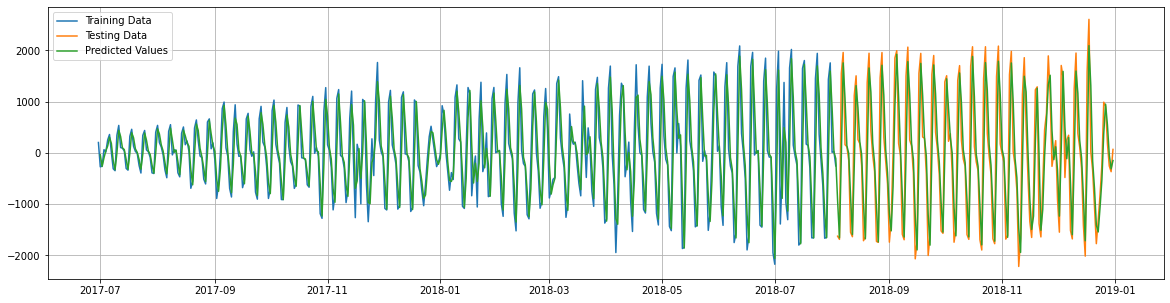

In [ ]:
moving_avg=diff.rolling(window =2).mean()
moving_avg.dropna(inplace=True)
training_data = moving_avg[:400]
testing_data = moving_avg[400:]
predict_data = moving_avg.copy()

predict_data['predicted_bike_numbers'] = predict_data['bike_numbers'].rolling(window=2).mean()

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(training_data.index, training_data, label='Training Data')
plt.plot(testing_data.index, testing_data, label='Testing Data')
plt.plot(predict_data.index, predict_data['predicted_bike_numbers'], label='Predicted Values')
plt.legend()
plt.show()


**As expected, the plot also shows accuracy. However, it can also be improved.**

**ARMA:**

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 820.101


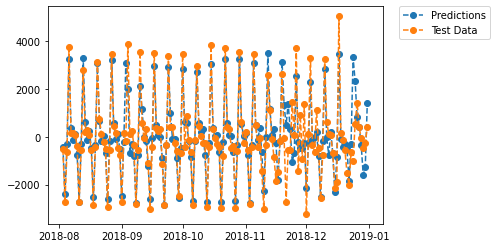

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#ARMA
ARMAmodel = SARIMAX(diff,order=(17,0,16))
ARMAmodel = ARMAmodel.fit()

ARMApred = ARMAmodel.predict(start=test.index.min(), end=test.index.max())
ARMApred= round(ARMApred)
rmse = sqrt(mean_squared_error(test, ARMApred))
print('Test RMSE: %.3f' % rmse)

plt.plot(ARMApred, linestyle='--', marker='o', label='Predictions')
plt.plot(test, linestyle='--', marker='o', label='Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

**As expected, RMSE is lower than that of AR and the accuracy looks better than AR and MA.**

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 820.101


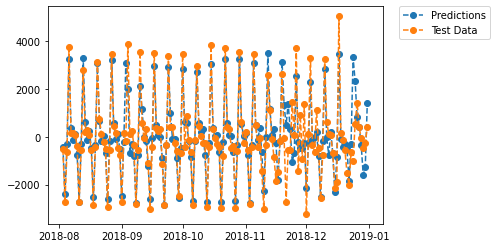

In [ ]:
#ARIMA
ARIMAmodel = SARIMAX(diff,order=(17,0,16))
ARIMAmodel = ARIMAmodel.fit()

ARIMApred = ARIMAmodel.predict(start=test.index.min(), end=test.index.max())
ARIMApred= round(ARIMApred)
rmse = sqrt(mean_squared_error(test, ARIMApred))
print('Test RMSE: %.3f' % rmse)

plt.plot(ARIMApred, linestyle='--', marker='o', label='Predictions')
plt.plot(test, linestyle='--', marker='o', label='Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

**ARMA and ARIMA have the same RMSE. This is expected because it does what ARMA does but also differences the data. Since our data is already difference, they gave the same results. Either ARMA or ARIMA are the best choice for our dataset.**